In [1]:
import cv2
from matplotlib import pyplot as plt

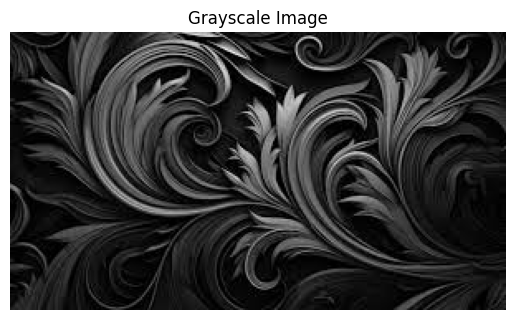

In [2]:
# Read the image in grayscale
image = cv2.imread('../data/images3.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was successfully loaded
if image is None:
    print("Error: Could not load image.")
else:
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')  # Hide axis
    plt.show()

In [3]:
image

array([[43, 34, 28, ..., 21,  0,  2],
       [ 3, 32, 46, ..., 14,  0,  7],
       [11,  3, 15, ..., 10,  9,  4],
       ...,
       [ 9, 15, 28, ..., 30, 31, 41],
       [19, 27, 34, ..., 23, 31, 37],
       [28, 36, 37, ..., 35, 31, 12]], dtype=uint8)

In [4]:
type(image)

numpy.ndarray

In [5]:
image.shape

(168, 300)

In [6]:
import numpy as np


In [7]:
unique_gray_levels, counts = np.unique(image, return_counts=True)
fre = dict(zip(unique_gray_levels, counts))
fre

{0: 3175,
 1: 692,
 2: 790,
 3: 938,
 4: 1023,
 5: 1100,
 6: 1155,
 7: 1198,
 8: 1161,
 9: 1104,
 10: 1101,
 11: 1024,
 12: 958,
 13: 875,
 14: 864,
 15: 898,
 16: 858,
 17: 819,
 18: 773,
 19: 759,
 20: 741,
 21: 657,
 22: 645,
 23: 626,
 24: 618,
 25: 552,
 26: 542,
 27: 551,
 28: 550,
 29: 506,
 30: 493,
 31: 482,
 32: 470,
 33: 405,
 34: 409,
 35: 436,
 36: 420,
 37: 433,
 38: 414,
 39: 394,
 40: 389,
 41: 378,
 42: 348,
 43: 351,
 44: 391,
 45: 338,
 46: 332,
 47: 316,
 48: 293,
 49: 329,
 50: 308,
 51: 290,
 52: 303,
 53: 280,
 54: 269,
 55: 270,
 56: 244,
 57: 278,
 58: 214,
 59: 239,
 60: 246,
 61: 247,
 62: 242,
 63: 224,
 64: 215,
 65: 238,
 66: 208,
 67: 213,
 68: 211,
 69: 233,
 70: 220,
 71: 219,
 72: 214,
 73: 187,
 74: 215,
 75: 197,
 76: 205,
 77: 215,
 78: 235,
 79: 246,
 80: 192,
 81: 208,
 82: 207,
 83: 202,
 84: 185,
 85: 178,
 86: 192,
 87: 167,
 88: 176,
 89: 200,
 90: 168,
 91: 172,
 92: 180,
 93: 179,
 94: 171,
 95: 143,
 96: 162,
 97: 158,
 98: 176,
 99: 156,
 

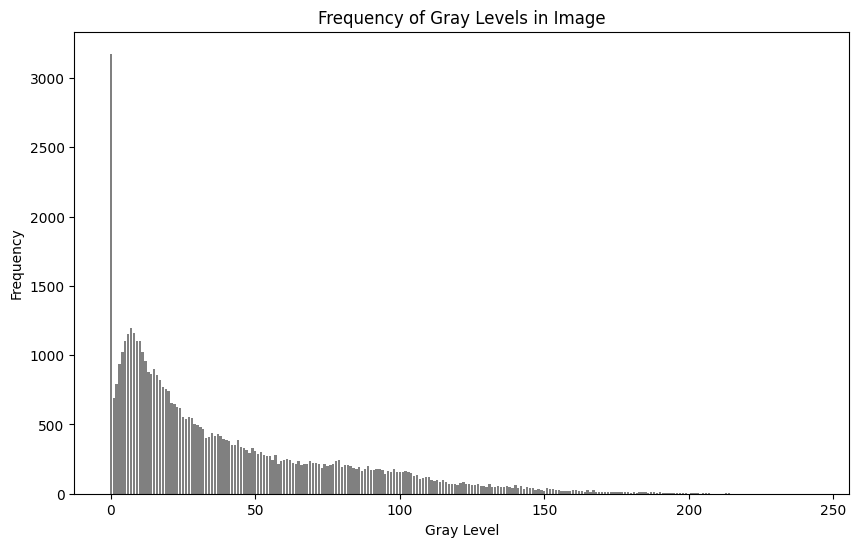

In [8]:

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(fre.keys(), fre.values(), color='gray')

# Label the axes and title the plot
plt.xlabel('Gray Level')
plt.ylabel('Frequency')
plt.title('Frequency of Gray Levels in Image')

# Display the plot
plt.show()

# Cân bằng lược đồ xám

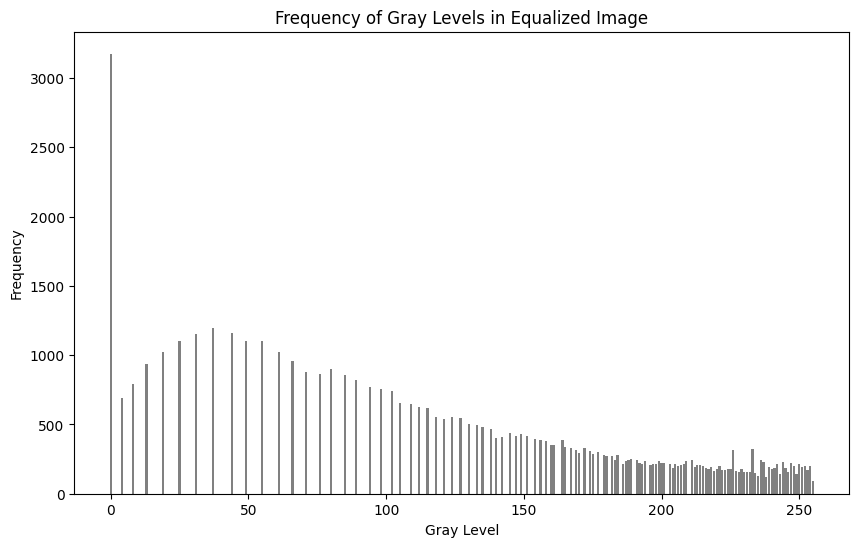

In [9]:
equalized_image = cv2.equalizeHist(image)
unique_gray_levels, counts = np.unique(equalized_image, return_counts=True)
fre = dict(zip(unique_gray_levels, counts))

# Create a bar plot for the equalized image
plt.figure(figsize=(10, 6))
plt.bar(fre.keys(), fre.values(), color='gray')

# Label the axes and title the plot
plt.xlabel('Gray Level')
plt.ylabel('Frequency')
plt.title('Frequency of Gray Levels in Equalized Image')

# Display the plot
plt.show()

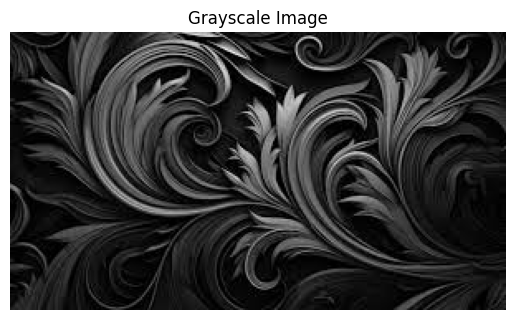

In [10]:
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  # Hide axis
plt.show()

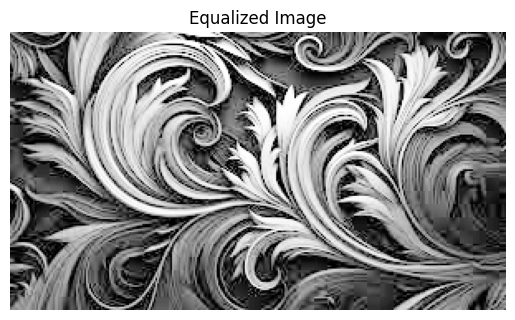

In [11]:
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')  # Hide axis
plt.show()

# Phát hiện biên

## Sử dụng đạo hàm bậc 1

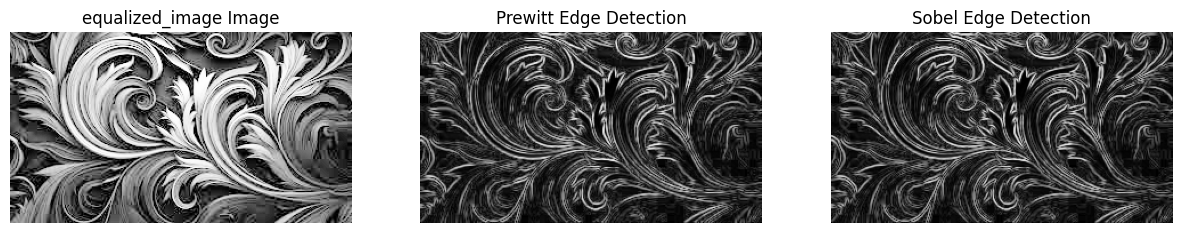

In [12]:
# Define Prewitt kernels
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Apply Prewitt operator
prewitt_x = cv2.filter2D(equalized_image, cv2.CV_32F, prewitt_kernel_x)
prewitt_y = cv2.filter2D(equalized_image, cv2.CV_32F, prewitt_kernel_y)
prewitt_edges = cv2.magnitude(prewitt_x, prewitt_y)

# Apply Sobel operator
sobel_x = cv2.Sobel(equalized_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(equalized_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Plot the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('equalized_image Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()

## Sử dụng đạo hàm bậc 2

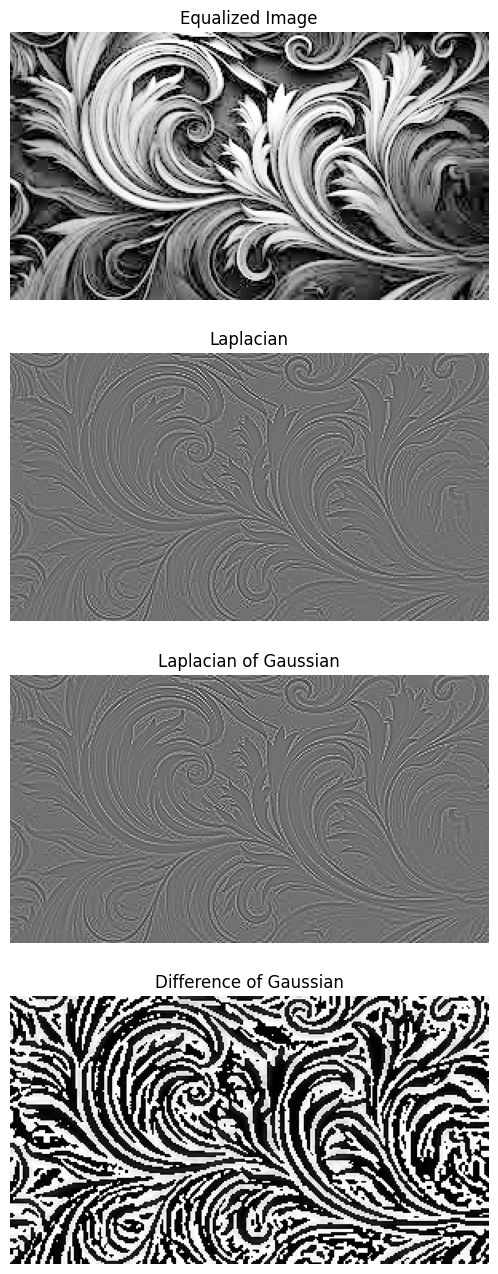

In [15]:

# Áp dụng toán tử Laplacian
laplacian = cv2.Laplacian(equalized_image, cv2.CV_64F)

# Áp dụng toán tử Laplacian of Gaussian (LoG)
blurred = cv2.GaussianBlur(equalized_image, (3, 3), 0)
log = cv2.Laplacian(equalized_image, cv2.CV_64F)

# Áp dụng toán tử Difference of Gaussian (DoG)
gaussian1 = cv2.GaussianBlur(equalized_image, (5, 5), 0)
gaussian2 = cv2.GaussianBlur(equalized_image, (9, 9), 0)
dog = gaussian1 - gaussian2

# Hiển thị kết quả
plt.figure(figsize=(8, 16))


plt.subplot(4, 1, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(4, 1, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.subplot(4, 1, 3)
plt.imshow(log, cmap='gray')
plt.title('Laplacian of Gaussian')
plt.axis('off')

plt.subplot(4, 1, 4)
plt.imshow(dog, cmap='gray')
plt.title('Difference of Gaussian')
plt.axis('off')

plt.show()